In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image

In [4]:
data = pd.read_csv("../dataset/postings.csv")

In [5]:
import re

# Sort only tech companies

# Define a list of programming languages, removing "Go" and ensuring accurate matches
programming_languages = [
    "Python", "Java", "JavaScript", "C\\+\\+", "C#", "Ruby", "Swift", "Kotlin",
    "Rust", "PHP", "TypeScript", "Scala", "Perl", "Haskell", "Lua",
    "Dart", "Objective-C", "MATLAB", "HTML", "CSS", "SQL", "NoSQL", "MongoDB", "MySQL", "PostgreSQL",
    "React", "Angular", "Vue", "Node.js", "Express", "Flask", "Django", "Spring", "Ruby on Rails",
    "TensorFlow", "PyTorch", "Keras", "Scikit-learn", "Pandas", "NumPy", "SciPy", "Matplotlib",
    "Kubernetes", "Docker", "Jenkins", "Travis CI", "GitLab CI", "GitLab", "GitHub", "Git",
    "AWS", "Azure", "Google Cloud", "GCP", "Heroku", "DigitalOcean", "Firebase", "Netlify",
    "Linux", "Unix", "Windows", "macOS", "iOS", "Android", "Raspberry Pi", "Arduino", "ESP32",
    "REST", "GraphQL", "gRPC", "SOAP", "WebSockets", "OAuth", "JWT", "OpenID", "SAML",
    "Agile", "Scrum", "Kanban", "XP", "Pair Programming", "TDD", "BDD", "CI/CD",
]

# Define additional tech-related keywords
tech_keywords = [
    "data science", "data analytics", 'machine learning', 'deep learning', 'artificial intelligence', "frontend", 'backend', 'git', 'api', 'apis', 'json', 'sdk', 'developer'
]

# Combine programming languages and tech-related keywords
combined_keywords = programming_languages + tech_keywords

# Convert the combined list into a regex pattern ensuring whole-word matches
pattern = r"\b(?:{})\b".format("|".join(combined_keywords))

# Count matches in title and description
data["match_count"] = data["title"].str.count(pattern, flags=re.IGNORECASE).fillna(0) + \
                    data["description"].str.count(pattern, flags=re.IGNORECASE).fillna(0)

# Filter jobs that match at least 2 of the combined keywords
tech_postings = data[data["match_count"] >= 3].drop(columns=["match_count"])

tech_postings.head(20)

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
26,175485704,GOYT,Software Engineer,Job Description:GOYT is seeking a skilled and ...,NaN,NaN,"Denver, CO",76987056.0,273.0,NaN,...,NaN,1.713281e+12,NaN,0,PART_TIME,NaN,NaN,NaN,80202.0,8031.0
78,2234533717,Ideando Inc,Full Stack Engineer,"Location: Remote\nCompany Overview:SkillFit, a...",NaN,NaN,United States,69611476.0,21.0,NaN,...,NaN,1.713493e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
108,3169712432,SysMind,Salesforce Vlocity Developer,Role: Salesforce Vlocity DeveloperLocation: Ne...,NaN,NaN,"Jersey City, NJ",85964.0,146.0,NaN,...,NaN,1.713211e+12,NaN,0,CONTRACT,NaN,NaN,NaN,7302.0,34017.0
116,3245063922,Saxon AI,Data Architect,Request: Data ArchitectLocation: San Francisco...,NaN,NaN,"San Francisco, CA",224935.0,7.0,NaN,...,NaN,1.713537e+12,NaN,0,CONTRACT,NaN,NaN,NaN,94101.0,6075.0
129,3366698309,Webologix Ltd/ INC,Anaplan Developer,Job Title: Anaplan Developer\n\nLocations: US ...,NaN,NaN,United States,14524845.0,2.0,NaN,...,NaN,1.713471e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
146,3475933396,USLI,Senior Developer,This individual will work with a high performa...,NaN,NaN,Greater Philadelphia,33421.0,NaN,NaN,...,NaN,1.713538e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
163,3533320307,NLB Services,Java architect / Lead Java developer,Position: Java architect / Lead Java developer...,NaN,NaN,"Jersey City, NJ",490432.0,3.0,NaN,...,NaN,1.712855e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,7302.0,34017.0
181,3586167732,StyleAI,Senior Software Engineer,"StyleAI is the AI-powered, all-in-one unified ...",NaN,NaN,San Francisco Bay Area,90662302.0,31.0,NaN,...,NaN,1.713397e+12,NaN,0,FULL_TIME,NaN,NaN,NaN,NaN,NaN
196,3625991523,Xoriant,DDI Engineer,Title: Infoblox/DNS EngineerLocation: 6860 Yos...,NaN,NaN,"Jersey City, NJ",166996.0,24.0,NaN,...,NaN,1.713277e+12,NaN,0,CONTRACT,NaN,NaN,NaN,7302.0,34017.0
237,3700068571,Akshaya Inc,Software Implementation Program Manager,Title: Software Implementation Program Manager...,NaN,NaN,"Cupertino, CA",18838319.0,2.0,NaN,...,NaN,1.713562e+12,NaN,0,CONTRACT,NaN,NaN,NaN,95014.0,6085.0


In [6]:
tech_postings.dropna(subset=['company_name'], inplace=True)

In [7]:
top_companies = tech_postings['company_name'].value_counts().nlargest(10)
print(top_companies)

company_name
Capital One                  266
DataAnnotation               205
Dice                         171
TEKsystems                   111
Tata Consultancy Services     94
Apex Systems                  92
Amazon Web Services (AWS)     76
Amazon                        73
Motion Recruitment            65
Compunnel Inc.                56
Name: count, dtype: int64


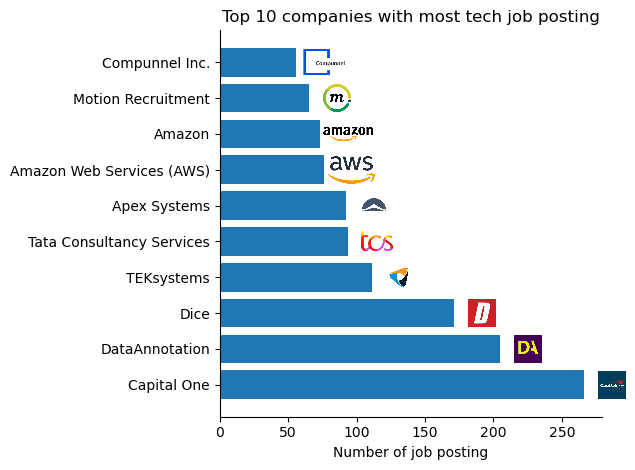

In [9]:
image = ['images/iloveimg-resized/Capital One.jpg', 'images/iloveimg-resized/DataAnnotation  .jpg', 'images/iloveimg-resized/Dice.png', 'images/iloveimg-resized/TEKsystems.png', 'images/iloveimg-resized/Tata Consultancy Services.png', 'images/iloveimg-resized/Apex Systems .png', 'images/iloveimg-resized/Amazon Web Services (AWS).png', 'images/iloveimg-resized/Amazon .png','images/iloveimg-resized/Motion Recruitment.jpeg', 'images/iloveimg-resized/Compunnel Inc..png' ]
fig, ax = plt.subplots()
bars = ax.barh(top_companies.index, top_companies.values)
def add_image_on_bar(bar, image):
    img = Image.open(image)
    imagebox = OffsetImage(img, zoom=0.1)  
    ab = AnnotationBbox(imagebox, (bar.get_width(), bar.get_y() + bar.get_height()/2), xybox=(20, 0),
                        xycoords='data', frameon=False,
                        boxcoords="offset points",
                        pad=0)
    ax.add_artist(ab)
for bar, image in zip(bars, image):
    add_image_on_bar(bar, image)
plt.title('Top 10 companies with most tech job posting')
plt.xlabel('Number of job posting')
plt.tight_layout()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()